# Hoofdstuk 7 Analytische meetkunde in drie dimensies

In [1]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
import numpy as np
matplotlib.rcParams["font.family"] = "monospace"
matplotlib.rcParams['font.style'] = "italic"
plt.rcParams.update({'mathtext.default':  'regular' })

## Rechten

### fig_ana_geo_1

In [2]:
def arrow3d(ax, length=1, width=0.05, head=0.2, headwidth=2,
                theta_x=0, theta_z=0, offset=(0,0,0), **kw):
    w = width
    h = head
    hw = headwidth
    theta_x = np.deg2rad(theta_x)
    theta_z = np.deg2rad(theta_z)

    a = [[0,0],[w,0],[w,(1-h)*length],[hw*w,(1-h)*length],[0,length]]
    a = np.array(a)

    r, theta = np.meshgrid(a[:,0], np.linspace(0,2*np.pi,30))
    z = np.tile(a[:,1],r.shape[0]).reshape(r.shape)
    x = r*np.sin(theta)
    y = r*np.cos(theta)

    rot_x = np.array([[1,0,0],[0,np.cos(theta_x),-np.sin(theta_x) ],
                      [0,np.sin(theta_x) ,np.cos(theta_x) ]])
    rot_z = np.array([[np.cos(theta_z),-np.sin(theta_z),0 ],
                      [np.sin(theta_z) ,np.cos(theta_z),0 ],[0,0,1]])

    b1 = np.dot(rot_x, np.c_[x.flatten(),y.flatten(),z.flatten()].T)
    b2 = np.dot(rot_z, b1)
    b2 = b2.T+np.array(offset)
    x = b2[:,0].reshape(r.shape); 
    y = b2[:,1].reshape(r.shape); 
    z = b2[:,2].reshape(r.shape); 
    ax.plot_surface(x,y,z, **kw)

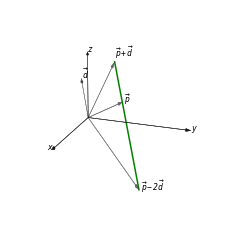

In [3]:
# figure set-up
fig1 = plt.figure(figsize=(4,4))
ax1 = plt.axes(projection='3d')
ax1.axis('off')
ax1.margins(0,0,0)

ax1.plot3D([-1, 5], [1, 4], [2, -1], 'green')
arrow3d(ax1, length=np.sqrt(6), width=0.01, head=0.1, headwidth=6, theta_x=65.905, theta_z=-63, color='grey')
arrow3d(ax1, length=np.sqrt(6), width=0.01, head=0.1, headwidth=6, theta_x=-65.905, theta_z=-26.565, color='grey')
arrow3d(ax1, length=np.sqrt(6), width=0.01, head=0.1, headwidth=6, theta_x=-35.264, theta_z=45, color='grey')
arrow3d(ax1, length=np.sqrt(42), width=0.01, head=0.05, headwidth=6, theta_x=-98.876, theta_z=-51.34, color='grey')

ax1.text(1, 2.1, 1, "$\\overrightarrow{p}$", color='black', size=8)
ax1.text(-1, 1, 2.2, "$\\overrightarrow{p}+\\overrightarrow{d}$", color='black', size=8)
ax1.text(5, 4.1, -1, "$\\overrightarrow{p}-2\\overrightarrow{d}$", color='black', size=8)
ax1.text(-2, -1, 1, "$\\overrightarrow{d}$", color='black', size=8)

# Axis
arrow3d(ax1, length=5, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black')
arrow3d(ax1, length=5, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black')
arrow3d(ax1, length=2.5, width=0.01, head=0.05, headwidth=6, color='black')

ax1.text(5, -0.2, 0, "x", color='black', size=8)
ax1.text(0, 5, 0, "y", color='black', size=8)
ax1.text(0, 0, 2.5, "z", color='black', size=8)

ax1.view_init(20, 20)
fig1.savefig("fig_ana_geo_1.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_2

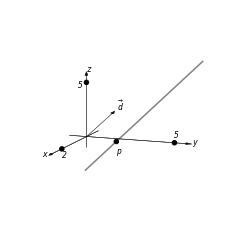

In [4]:
# figure set-up
fig2 = plt.figure(figsize=(4,4))
ax2 = plt.axes(projection='3d')
ax2.axis('off')
ax2.margins(0,0,0)
t = np.linspace(-1, 3, 100)

ax2.plot3D(2-t, 3+t, 1+2*t, 'grey')
arrow3d(ax2, length=np.sqrt(6), width=0.01, head=0.1, headwidth=10, theta_x=-35.264, theta_z=45, color='black')
ax2.scatter([2, 2, 0, 0], [3, 0, 5, 0], [1, 0, 0, 5], color='black',alpha=1)

ax2.text(2, 3, 0, "p", color='black', size=8)
ax2.text(-2, 0.5, 1.5, "$\\overrightarrow{d}$", color='black', size=8)

# Axis
arrow3d(ax2, length=4, width=0.02, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax2, length=7, width=0.02, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax2, length=7, width=0.01, head=0.05, headwidth=8, offset=(0,0,-1), color='black')

ax2.text(3.2, -0.2, 0, "x", color='black', size=8)
ax2.text(0, 6, 0, "y", color='black', size=8)
ax2.text(0, 0, 6, "z", color='black', size=8)

ax2.text(2, 0, -0.7, "2", color='black', size=8)
ax2.text(0, 5, 0.5, "5", color='black', size=8)
ax2.text(0, -0.5, 4.5, "5", color='black', size=8)

ax2.view_init(10, 20)
fig2.savefig("fig_ana_geo_2.pdf",bbox_inches='tight',dpi=200)
fig2.savefig("fig_ana_geo_2(tbc).pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_3

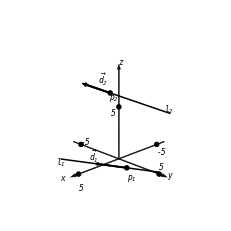

In [5]:
# figure set-up
fig3 = plt.figure(figsize=(4,4))
ax3 = plt.axes(projection='3d')
ax3.axis('off')
ax3.set_xlim3d(-6, 6)
ax3.set_ylim3d(-6, 6)
ax3.set_zlim3d(0, 9)
ax3.margins(0,0,0)

t = np.linspace(-1, 2, 100)
ax3.plot3D(1+3*t, 2-t, t, 'black')
s = np.linspace(-0.5, 3, 100)
ax3.plot3D(-2+4*s, 3+s, 5+2*s, 'black')

arrow3d(ax3, length=np.sqrt(11), width=0.08, head=0.1, headwidth=2, theta_x=-72.452, theta_z=-108.435, offset=(1,2,0), color='black')
arrow3d(ax3, length=np.sqrt(21), width=0.08, head=0.1, headwidth=2, theta_x=64.123, theta_z=104.036, offset=(6,5,9), color='black')

ax3.scatter([1, 6, 5, -5, 0, 0, 0], [2, 5, 0, 0, 5, -5, 0], [0, 9, 0, 0, 0, 0, 5], color='black',alpha=1)

ax3.text(2, 3, -0.5, "p$_1$", color='black', size=8)
ax3.text(6, 4.8, 8.4, "p$_2$", color='black', size=8)
ax3.text(2.8, -1, 0.3, "$\\overrightarrow{d_1}$", color='black', size=8)
ax3.text(0, -2.7, 6.5, "$\\overrightarrow{d_2}$", color='black', size=8)
ax3.text(5, -3, 0, "l$_1$", color='black', size=8)
ax3.text(0, 5.5, 6, "l$_2$", color='black', size=8)

# Axis
arrow3d(ax3, length=12, width=0.05, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-6,0,0), color='black')
arrow3d(ax3, length=12, width=0.05, head=0.05, headwidth=3, theta_x=-90, offset=(0,-6,0), color='black')
arrow3d(ax3, length=9, width=0.05, head=0.05, headwidth=3, color='black')

ax3.text(7, -0.2, 0, "x", color='black', size=8)
ax3.text(0, 6, 0, "y", color='black', size=8)
ax3.text(0, 0, 9, "z", color='black', size=8)

ax3.text(5, 0, -1.5, "5", color='black', size=8)
ax3.text(0, 5, 0.5, "5", color='black', size=8)
ax3.text(0, -1, 4, "5", color='black', size=8)
ax3.text(-5, 0, -1, "-5", color='black', size=8)
ax3.text(0, -5, 0, "-5", color='black', size=8)

ax3.view_init(20, 45)
fig3.savefig("fig_ana_geo_3.pdf",bbox_inches='tight',dpi=200)
plt.show()

## Vlakken

### fig_ana_geo_4a

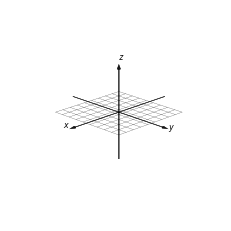

In [6]:
# figure set-up
fig4a = plt.figure(figsize=(4,4))
ax4a = plt.axes(projection='3d')
ax4a.set_xlim3d(-1.5, 1.5)
ax4a.set_ylim3d(-1.5, 1.5)
ax4a.set_zlim3d(-2, 2)
ax4a.axis('off')
ax4a.margins(0,0,0)

x, y = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
z = np.zeros(x.shape)
ax4a.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Axis
arrow3d(ax4a, length=3, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1.5,0,0), color='black')
arrow3d(ax4a, length=3, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1.5,0), color='black')
arrow3d(ax4a, length=4, width=0.01, head=0.05, headwidth=4, offset=(0,0,-2), color='black')

ax4a.text(1.5, -0.2, 0, "x", color='black', size=8)
ax4a.text(0, 1.5, 0, "y", color='black', size=8)
ax4a.text(0, 0, 2.2, "z", color='black', size=8)

ax4a.view_init(20, 45)
fig4a.savefig("fig_ana_geo_4a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_4b

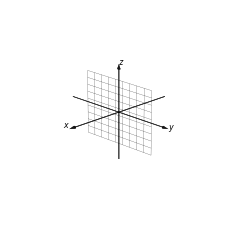

In [7]:
# figure set-up
fig4b = plt.figure(figsize=(4,4))
ax4b = plt.axes(projection='3d')
ax4b.set_xlim3d(-2, 2)
ax4b.set_ylim3d(-1.5, 1.5)
ax4b.set_zlim3d(-1.5, 1.5)
ax4b.axis('off')
ax4b.margins(0,0,0)

z, y = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
x = np.zeros(x.shape)
ax4b.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Axis
arrow3d(ax4b, length=4, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-2,0,0), color='black')
arrow3d(ax4b, length=3, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1.5,0), color='black')
arrow3d(ax4b, length=3, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1.5), color='black')

ax4b.text(2, -0.2, 0, "x", color='black', size=8)
ax4b.text(0, 1.5, 0, "y", color='black', size=8)
ax4b.text(0, 0, 1.5, "z", color='black', size=8)

ax4b.view_init(20, 45)
fig4b.savefig("fig_ana_geo_4b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_4c

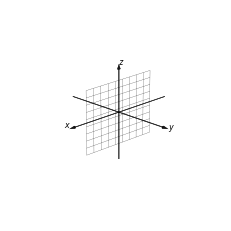

In [8]:
# figure set-up
fig4c = plt.figure(figsize=(4,4))
ax4c = plt.axes(projection='3d')
ax4c.set_xlim3d(-1.5, 1.5)
ax4c.set_ylim3d(-2, 2)
ax4c.set_zlim3d(-1.5, 1.5)
ax4c.axis('off')
ax4c.margins(0,0,0)

x, z = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
y = np.zeros(x.shape)
ax4c.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Axis
arrow3d(ax4c, length=3, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1.5,0,0), color='black')
arrow3d(ax4c, length=4, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-2,0), color='black')
arrow3d(ax4c, length=3, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1.5), color='black')

ax4c.text(1.5, -0.2, 0, "x", color='black', size=8)
ax4c.text(0, 2, 0, "y", color='black', size=8)
ax4c.text(0, 0, 1.5, "z", color='black', size=8)

ax4c.view_init(20, 45)
fig4c.savefig("fig_ana_geo_4c.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_4a(tbc)

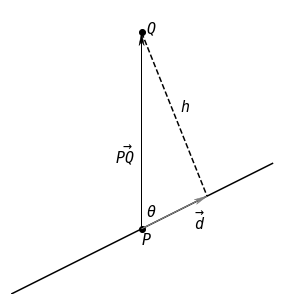

In [9]:
fig4atbc = plt.figure(figsize=(4,4))
ax4atbc = fig4atbc.add_axes([0,0,1,1])
ax4atbc.set_xlim(0, 1.1)
ax4atbc.set_ylim(0, 1.1)
ax4atbc.set_yticks([])
ax4atbc.set_xticks([])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax4atbc.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax4atbc.spines[direction].set_position('zero')

ax4atbc.plot([0, 1], [0, 0.5], color="black")
ax4atbc.plot([0.5, 0.75], [1, 0.75/2], color="black", ls='--')
ax4atbc.scatter([0.5, 0.5], [0.25, 1], color="black")
ax4atbc.arrow(0.5, 0.25, 0, 0.75, fc='k', ec='k', lw = .5, head_width=0.02, head_length=0.05, overhang = 0.3, length_includes_head= True, clip_on = False)
ax4atbc.arrow(0.5, 0.25, 0.25, 0.25/2, fc='grey', ec='grey', lw = .5, head_width=0.02, head_length=0.05, overhang = 0.3, length_includes_head= True, clip_on = False, zorder=10)

ax4atbc.text(0.7, 0.25, "$\\overrightarrow{d}$", color='black', size=15)
ax4atbc.text(0.4, 0.5, "$\\overrightarrow{PQ}$", color='black', size=15)
ax4atbc.text(0.65, 0.7, "h", color='black', size=15)
ax4atbc.text(0.52, 1, "Q", color='black', size=15)
ax4atbc.text(0.5, 0.19, "P", color='black', size=15)
ax4atbc.text(0.52, 0.3, "\u03B8", color='black', size=15)

fig4atbc.savefig("fig_ana_geo_4a(tbc).pdf",bbox_inches='tight')
plt.show()

### fig_ana_geo_4b(tbc)

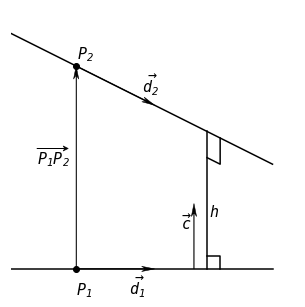

In [10]:
fig4btbc = plt.figure(figsize=(4,4))
ax4btbc = fig4btbc.add_axes([0,0,1,1])
ax4btbc.set_xlim(0, 1.1)
ax4btbc.set_ylim(0, 1.1)
ax4btbc.set_yticks([])
ax4btbc.set_xticks([])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax4btbc.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax4btbc.spines[direction].set_position('zero')

ax4btbc.plot([0, 1], [1, 0.5], color="black")
ax4btbc.plot([0, 1], [0.1, 0.1], color="black")
ax4btbc.plot([0.75, 0.75], [0.1, 0.625], color="black")
ax4btbc.scatter([0.25, 0.25], [0.1, 0.875], color="black")
ax4btbc.arrow(0.25, 0.1, 0, 0.775, fc='k', ec='k', lw = .5, head_width=0.02, head_length=0.05, overhang = 0.3, length_includes_head= True, clip_on = False)
ax4btbc.arrow(0.7, 0.1, 0, 0.25, fc='k', ec='k', lw = .5, head_width=0.02, head_length=0.05, overhang = 0.3, length_includes_head= True, clip_on = False, zorder=10)
ax4btbc.arrow(0.25, 0.875, 0.3, -0.15, fc='k', ec='k', lw = .5, head_width=0.02, head_length=0.05, overhang = 0.3, length_includes_head= True, clip_on = False)
ax4btbc.arrow(0.25, 0.1, 0.3, 0, fc='k', ec='k', lw = .5, head_width=0.02, head_length=0.05, overhang = 0.3, length_includes_head= True, clip_on = False)

ax4btbc.plot([0.75, 0.8, 0.8], [0.15, 0.15, 0.1], color='black')
ax4btbc.plot([0.75, 0.8, 0.8], [0.525, 0.5, 0.6], color='black')

ax4btbc.text(0.65, 0.25, "$\\overrightarrow{c}$", color='black', size=15)
ax4btbc.text(0.45, 0, "$\\overrightarrow{d_1}$", color='black', size=15)
ax4btbc.text(0.5, 0.77, "$\\overrightarrow{d_2}$", color='black', size=15)
ax4btbc.arrow(0.1, 0.56, 0.12, 0, fc='k', ec='k', lw = .5, head_width=0.02, head_length=0.02, overhang = 0.3, length_includes_head= True, clip_on = False, zorder=10)
ax4btbc.text(0.1, 0.5, "$P_1P_2$", color='black', size=15)
ax4btbc.text(0.76, 0.3, "h", color='black', size=15)
ax4btbc.text(0.252, 0.9, "P$_2$", color='black', size=15)
ax4btbc.text(0.25, 0, "P$_1$", color='black', size=15)

fig4btbc.savefig("fig_ana_geo_4b(tbc).pdf",bbox_inches='tight')
plt.show()

### fig_ana_geo_5

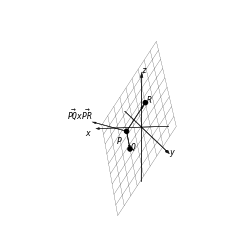

In [11]:
# figure set-up
fig5 = plt.figure(figsize=(4,4))
ax5 = plt.axes(projection='3d')
ax5.set_xlim3d(-2, 5)
ax5.set_ylim3d(-2, 5)
ax5.set_zlim3d(-2, 5)
ax5.axis('off')
ax5.margins(0,0,0)

ax5.scatter([1, 1, 0], [1, 2, 1], [0, -1, 2], color='black',alpha=1)
arrow3d(ax5, length=np.sqrt(2), width=0.02, head=0.2, headwidth=3, theta_x=-135, offset=(1,1,0), color='black')
arrow3d(ax5, length=np.sqrt(5), width=0.02, head=0.2, headwidth=3, theta_x=26.565, theta_z=-90, offset=(1,1,0), color='black')
arrow3d(ax5, length=np.sqrt(6), width=0.02, head=0.1, headwidth=3, theta_x=65.905, theta_z=116.565, offset=(1,1,0), color='black')

def f(x, y):
    return -2*(x-1)-(y-1)
x, y = np.meshgrid(np.linspace(-1, 2, 10), np.linspace(-1, 4, 10))
z = np.array(f(np.ravel(x), np.ravel(y)))
z = z.reshape(x.shape)
ax5.plot_wireframe(x, y, z, color='black', linewidth=0.2)

ax5.text(1.5, 1, -0.8, "P", color='black', size=8)
ax5.text(0.95, 2, -1, "Q", color='black', size=8)
ax5.text(-0.1, 1, 2, "R", color='black', size=8)
ax5.text(4, -0.2, 0.8, "$\\overrightarrow{PQ}x\\overrightarrow{PR}$", color='black', size=8)

# Axis
arrow3d(ax5, length=4, width=0.02, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1.5,0,0), color='black')
arrow3d(ax5, length=12, width=0.02, head=0.05, headwidth=4, theta_x=-90, offset=(0,-5,0), color='black')
arrow3d(ax5, length=8, width=0.02, head=0.05, headwidth=4, offset=(0,0,-4), color='black')

ax5.text(3, -0.2, -0.5, "x", color='black', size=8)
ax5.text(0, 7, 0, "y", color='black', size=8)
ax5.text(0, 0, 4, "z", color='black', size=8)

ax5.view_init(10, 80)
fig5.savefig("fig_ana_geo_5.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_6

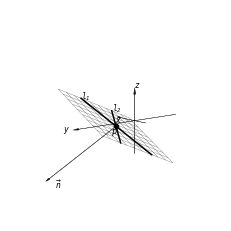

In [12]:
# figure set-up
fig6 = plt.figure(figsize=(4,4))
ax6 = plt.axes(projection='3d')
ax6.set_xlim3d(-5, 7)
ax6.set_ylim3d(-5, 7)
ax6.set_zlim3d(-5, 7)
ax6.axis('off')
ax6.margins(0,0,0)

ax6.scatter([-1], [3], [0], color='black',alpha=1)
t = np.linspace(-2, 0, 100)
ax6.plot3D(2+3*t, 1-2*t, 1+t, 'black')
s = np.linspace(0.5, 3.5, 100)
ax6.plot3D(-5+2*s, 1+s, -4+2*s, 'black')
arrow3d(ax6, length=3*np.sqrt(10), width=0.02, head=0.05, headwidth=5, theta_x=137.55, theta_z=38.65+90, offset=(-1,3,0), color='black')

def f(x, y):
    return (5*x+4*y-7)/7
x, y = np.meshgrid(np.linspace(-4, 2, 10), np.linspace(-1, 7, 10))
z = np.array(f(np.ravel(x), np.ravel(y)))
z = z.reshape(x.shape)
ax6.plot_wireframe(x, y, z, color='black', linewidth=0.2)

ax6.text(-1, 3.5, -1, "P", color='black', size=8)
ax6.text(2, 4.5, 3, "l$_1$", color='black', size=8)
ax6.text(2, 1, 1, "l$_2$", color='black', size=8)
ax6.text(4, 6, -8, "$\\overrightarrow{n}$", color='black', size=8)

# Axis
arrow3d(ax6, length=4, width=0.02, head=0.1, headwidth=5, theta_x=90, theta_z=90, offset=(-1.5,0,0), color='black')
arrow3d(ax6, length=12, width=0.02, head=0.05, headwidth=5, theta_x=-90, offset=(0,-5,0), color='black')
arrow3d(ax6, length=8, width=0.02, head=0.1, headwidth=5, offset=(0,0,-4), color='black')

ax6.text(3, -0.2, -0.75, "x", color='black', size=8)
ax6.text(0, 8, 0, "y", color='black', size=8)
ax6.text(0, 0, 4, "z", color='black', size=8)

ax6.view_init(10, 140)
fig6.savefig("fig_ana_geo_6.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_7

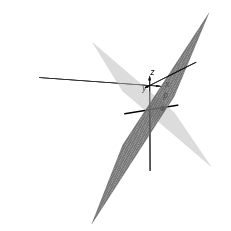

In [13]:
# figure set-up
fig7 = plt.figure(figsize=(4,4))
ax7 = plt.axes(projection='3d')
ax7.set_xlim3d(-5, 0.5)
ax7.set_ylim3d(-5, 0.5)
ax7.set_zlim3d(-5, 0.5)
ax7.axis('off')
ax7.margins(0,0,0)

ax7.scatter([1], [1], [-1], color='black',alpha=1)
t = np.linspace(-1, 2, 100)
ax7.plot3D(1-2*t, 1-3*t, -1-t, 'black')

def f1(x, y):
    return -x+y-1
def f2(x, y):
    return 2*x-y-2

x, y = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
z = np.array(f1(np.ravel(x), np.ravel(y)))
z = z.reshape(x.shape)
ax7.plot_surface(x, y, z, color="white", linewidth=0.5, alpha=0.5)
z = np.array(f2(np.ravel(x), np.ravel(y)))
z = z.reshape(x.shape)
ax7.plot_surface(x, y, z, color="grey", linewidth=0.5, alpha=0.9, zorder=10)

ax7.text(1, 1, -0.5, "P", color='black', size=8)

# Axis
arrow3d(ax7, length=5.6, width=0.02, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-5,0,0), color='black')
arrow3d(ax7, length=5.6, width=0.02, head=0.05, headwidth=3, theta_x=-90, offset=(0,-5,0), color='black')
arrow3d(ax7, length=5.6, width=0.02, head=0.05, headwidth=3, offset=(0,0,-5), color='black')

ax7.text(0.7, 0, 0, "x", color='black', size=8)
ax7.text(0, 1, 0, "y", color='black', size=8)
ax7.text(0, 0, 0.7, "z", color='black', size=8)

ax7.view_init(-10,250)
fig7.savefig("fig_ana_geo_7.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_8

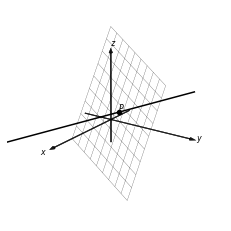

In [14]:
# figure set-up
fig8 = plt.figure(figsize=(4,4))
ax8 = plt.axes(projection='3d')
ax8.set_xlim3d(-1, 3)
ax8.set_ylim3d(-1, 3)
ax8.set_zlim3d(-1, 3)
ax8.axis('off')
ax8.margins(0,0,0)

ax8.scatter([1], [1], [1], color='black',alpha=1)
t = np.linspace(-1, 3, 100)
ax8.plot3D(3-t, -3+2*t, -1+t, 'black')

def f(x, y):
    return -2*x-y+4

x, y = np.meshgrid(np.linspace(0, 2, 10), np.linspace(0, 2, 10))
z = np.array(f(np.ravel(x), np.ravel(y)))
z = z.reshape(x.shape)
ax8.plot_wireframe(x, y, z, color='black', linewidth=0.2)

ax8.text(1, 1, 1.1, "P", color='black', size=8)

# Axis
arrow3d(ax8, length=4.1, width=0.02, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax8, length=4.1, width=0.02, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax8, length=4.1, width=0.02, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax8.text(3.5, 0, 0, "x", color='black', size=8)
ax8.text(0, 3.1, 0, "y", color='black', size=8)
ax8.text(0, 0, 3.2, "z", color='black', size=8)

ax8.view_init(20, 35)
fig8.savefig("fig_ana_geo_8.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_9(tbc)

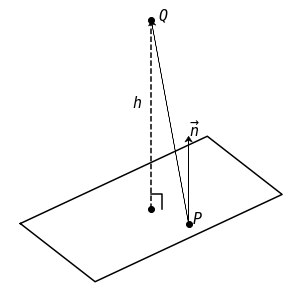

In [15]:
fig9tbc = plt.figure(figsize=(4,4))
ax9tbc = fig9tbc.add_axes([0,0,1,1])
ax9tbc.set_yticks([])
ax9tbc.set_xticks([])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax9tbc.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax9tbc.spines[direction].set_position('zero')

ax9tbc.plot([0, 5, 7, 2, 0], [0, 3, 1, -2, 0], color="black")
ax9tbc.plot([3.5, 3.5], [0.5, 7], color="black", ls='--')
ax9tbc.plot([3.5, 3.8, 3.8], [1, 1, 0.5], color="black")
ax9tbc.scatter([3.5, 3.5, 4.5], [0.5, 7, 0], color="black")
ax9tbc.arrow(4.5, 0, 0, 3, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9tbc.arrow(4.5, 0, -1, 7, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False, zorder=10)

ax9tbc.text(4.5, 3, "$\\overrightarrow{n}$", color='black', size=15)
ax9tbc.text(4.6, 0, "P", color='black', size=15)
ax9tbc.text(3, 4, "h", color='black', size=15)
ax9tbc.text(3.7, 7, "Q", color='black', size=15)

fig9tbc.savefig("fig_ana_geo_9(tbc).pdf",bbox_inches='tight')
plt.show()

## Driedimensionale lichamen

### fig_ana_geo_10a

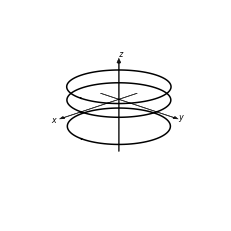

In [16]:
# figure set-up
fig10a = plt.figure(figsize=(4,4))
ax10a = plt.axes(projection='3d')
ax10a.axis('off')
ax10a.margins(0,0,0)

ax10a.plot3D([2*np.cos(t) for t in np.linspace(0, 2*np.pi, 100)], [2*np.sin(t) for t in np.linspace(0, 2*np.pi, 100)], [1 for _ in range(100)], color='black')
ax10a.plot3D([2*np.cos(t) for t in np.linspace(0, 2*np.pi, 100)], [2*np.sin(t) for t in np.linspace(0, 2*np.pi, 100)], [0 for _ in range(100)], color='black')
ax10a.plot3D([2*np.cos(t) for t in np.linspace(0, 2*np.pi, 100)], [2*np.sin(t) for t in np.linspace(0, 2*np.pi, 100)], [-2 for _ in range(100)], color='black')

# Axis
arrow3d(ax10a, length=4.1, width=0.02, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax10a, length=4.1, width=0.02, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax10a, length=7.1, width=0.02, head=0.05, headwidth=4, offset=(0,0,-4), color='black')

ax10a.text(3.5, 0, 0, "x", color='black', size=8)
ax10a.text(0, 3.1, 0, "y", color='black', size=8)
ax10a.text(0, 0, 3.2, "z", color='black', size=8)

ax10a.view_init(20, 45)
fig10a.savefig("fig_ana_geo_10a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_10b

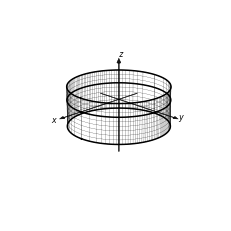

In [17]:
# figure set-up
fig10b = plt.figure(figsize=(4,4))
ax10b = plt.axes(projection='3d')
ax10b.axis('off')
ax10b.margins(0,0,0)

ax10b.plot3D([2*np.cos(t) for t in np.linspace(0, 2*np.pi, 100)], [2*np.sin(t) for t in np.linspace(0, 2*np.pi, 100)], [1 for _ in range(100)], color='black')
ax10b.plot3D([2*np.cos(t) for t in np.linspace(0, 2*np.pi, 100)], [2*np.sin(t) for t in np.linspace(0, 2*np.pi, 100)], [0 for _ in range(100)], color='black')
ax10b.plot3D([2*np.cos(t) for t in np.linspace(0, 2*np.pi, 100)], [2*np.sin(t) for t in np.linspace(0, 2*np.pi, 100)], [-2 for _ in range(100)], color='black')

x, z = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 1, 10))
y = np.sqrt(4-x**2)
ax10b.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax10b.plot_wireframe(x, -y, z, color='black', linewidth=0.2)


# Axis
arrow3d(ax10b, length=4.1, width=0.02, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax10b, length=4.1, width=0.02, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax10b, length=7.1, width=0.02, head=0.05, headwidth=4, offset=(0,0,-4), color='black')

ax10b.text(3.5, 0, 0, "x", color='black', size=8)
ax10b.text(0, 3.1, 0, "y", color='black', size=8)
ax10b.text(0, 0, 3.2, "z", color='black', size=8)

ax10b.view_init(20, 45)
fig10b.savefig("fig_ana_geo_10b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_11a

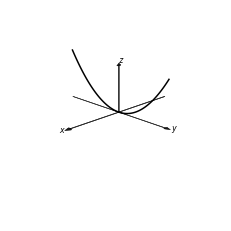

In [18]:
# figure set-up
fig11a = plt.figure(figsize=(4,4))
ax11a = plt.axes(projection='3d')
ax11a.set_xlim3d(-1, 1)
ax11a.set_ylim3d(-2, 2)
ax11a.set_zlim3d(-4, 4)
ax11a.axis('off')
ax11a.margins(0,0,0)

ax11a.plot3D([0 for _ in range(100)], np.linspace(-2, 2, 100), [t**2 for t in np.linspace(-2, 2, 100)], color='black')

# Axis
arrow3d(ax11a, length=2.1, width=0.02, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax11a, length=4.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-2,0), color='black')
arrow3d(ax11a, length=4.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,0), color='black')

ax11a.text(1.2, 0, 0, "x", color='black', size=8)
ax11a.text(0, 2.1, 0, "y", color='black', size=8)
ax11a.text(0, 0, 4.2, "z", color='black', size=8)

ax11a.view_init(20, 45)
fig11a.savefig("fig_ana_geo_11a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_11b

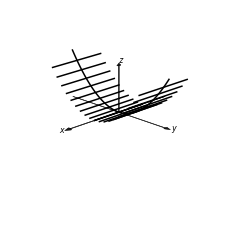

In [19]:
# figure set-up
fig11b = plt.figure(figsize=(4,4))
ax11b = plt.axes(projection='3d')
ax11b.set_xlim3d(-1, 1)
ax11b.set_ylim3d(-2, 2)
ax11b.set_zlim3d(-4, 4)
ax11b.axis('off')
ax11b.margins(0,0,0)

ax11b.plot3D([0 for _ in range(100)], np.linspace(-2, 2, 100), [t**2 for t in np.linspace(-2, 2, 100)], color='black')
for i in range(10):
    ax11b.plot3D([-0.5, 0.5], [i/5, i/5], [(i/5)**2, (i/5)**2], color='black')
    ax11b.plot3D([-0.5, 0.5], [-i/5, -i/5], [(i/5)**2, (i/5)**2], color='black')

# Axis
arrow3d(ax11b, length=2.1, width=0.02, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax11b, length=4.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-2,0), color='black')
arrow3d(ax11b, length=4.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,0), color='black')

ax11b.text(1.2, 0, 0, "x", color='black', size=8)
ax11b.text(0, 2.1, 0, "y", color='black', size=8)
ax11b.text(0, 0, 4.2, "z", color='black', size=8)

ax11b.view_init(20, 45)
fig11b.savefig("fig_ana_geo_11b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_11c

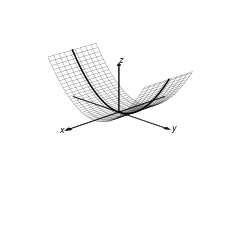

In [20]:
# figure set-up
fig11c = plt.figure(figsize=(4,4))
ax11c = plt.axes(projection='3d')
ax11c.set_xlim3d(-1, 1)
ax11c.set_ylim3d(-2, 2)
ax11c.set_zlim3d(-4, 4)
ax11c.axis('off')
ax11c.margins(0,0,0)

ax11c.plot3D([0 for _ in range(100)], np.linspace(-2, 2, 100), [t**2 for t in np.linspace(-2, 2, 100)], color='black')
x, y = np.meshgrid(np.linspace(-0.5, 0.5, 10), np.linspace(-2, 2, 100))
z = y**2
ax11c.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Axis
arrow3d(ax11c, length=2.1, width=0.02, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax11c, length=4.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-2,0), color='black')
arrow3d(ax11c, length=4.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,0), color='black')

ax11c.text(1.2, 0, 0, "x", color='black', size=8)
ax11c.text(0, 2.1, 0, "y", color='black', size=8)
ax11c.text(0, 0, 4.2, "z", color='black', size=8)

ax11c.view_init(20, 45)
fig11c.savefig("fig_ana_geo_11c.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_geo_ana_12a

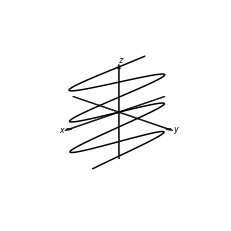

In [21]:
# figure set-up
fig12a = plt.figure(figsize=(4,4))
ax12a = plt.axes(projection='3d')
ax12a.set_xlim3d(-1, 1)
ax12a.set_ylim3d(-1, 1)
ax12a.set_zlim3d(-10, 10)
ax12a.axis('off')
ax12a.margins(0,0,0)

ax12a.plot3D([np.sin(t) for t in np.linspace(-10, 10, 100)], [0 for _ in range(100)], np.linspace(-10, 10, 100), color='black')

# Axis
arrow3d(ax12a, length=2.1, width=0.02, head=0.05, headwidth=2.5, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax12a, length=2.1, width=0.02, head=0.05, headwidth=2.5, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax12a, length=20.1, width=0.01, head=0.05, headwidth=2.5, offset=(0,0,-10), color='black')

ax12a.text(1.2, 0, 0, "x", color='black', size=8)
ax12a.text(0, 1.1, 0, "y", color='black', size=8)
ax12a.text(0, 0, 10.3, "z", color='black', size=8)

ax12a.view_init(20, 45)
fig12a.savefig("fig_ana_geo_12a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_12b

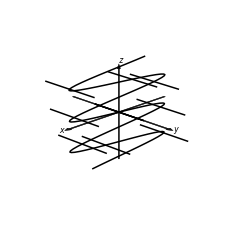

In [22]:
# figure set-up
fig12b = plt.figure(figsize=(4,4))
ax12b = plt.axes(projection='3d')
ax12b.set_xlim3d(-1, 1)
ax12b.set_ylim3d(-1, 1)
ax12b.set_zlim3d(-10, 10)
ax12b.axis('off')
ax12b.margins(0,0,0)

ax12b.plot3D([np.sin(t) for t in np.linspace(-10, 10, 100)], [0 for _ in range(100)], np.linspace(-10, 10, 100), color='black')

for i in range(5):
    ax12b.plot3D([np.sin(i*2), np.sin(i*2)], [-0.5, 0.5], [i*2, i*2], color='black')
    ax12b.plot3D([np.sin(-i*2), np.sin(-i*2)], [-0.5, 0.5], [-i*2, -i*2], color='black')
# Axis
arrow3d(ax12b, length=2.1, width=0.02, head=0.05, headwidth=2.5, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax12b, length=2.1, width=0.02, head=0.05, headwidth=2.5, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax12b, length=20.1, width=0.01, head=0.05, headwidth=2.5, offset=(0,0,-10), color='black')

ax12b.text(1.2, 0, 0, "x", color='black', size=8)
ax12b.text(0, 1.1, 0, "y", color='black', size=8)
ax12b.text(0, 0, 10.3, "z", color='black', size=8)

ax12b.view_init(20, 45)
fig12b.savefig("fig_ana_geo_12b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_trans_12c

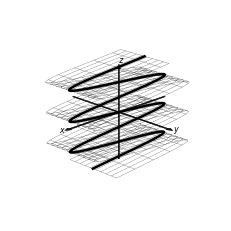

In [23]:
# figure set-up
fig12c = plt.figure(figsize=(4,4))
ax12c = plt.axes(projection='3d')
ax12c.set_xlim3d(-1, 1)
ax12c.set_ylim3d(-1, 1)
ax12c.set_zlim3d(-10, 10)
ax12c.axis('off')
ax12c.margins(0,0,0)

ax12c.plot3D([np.sin(t) for t in np.linspace(-10, 10, 100)], [0 for _ in range(100)], np.linspace(-10, 10, 100), color='black', lw=2.5)
y, z = np.meshgrid(np.linspace(-0.5, 0.5, 10), np.linspace(-10, 10, 100))
x = np.sin(z)
ax12c.plot_wireframe(x, y, z, color='black', linewidth=0.2)
# Axis
arrow3d(ax12c, length=2.1, width=0.02, head=0.05, headwidth=2.5, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax12c, length=2.1, width=0.02, head=0.05, headwidth=2.5, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax12c, length=20.1, width=0.01, head=0.05, headwidth=2.5, offset=(0,0,-10), color='black')

ax12c.text(1.2, 0, 0, "x", color='black', size=8)
ax12c.text(0, 1.1, 0, "y", color='black', size=8)
ax12c.text(0, 0, 10.3, "z", color='black', size=8)

ax12c.view_init(20, 45)
fig12c.savefig("fig_ana_geo_12c.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_13a

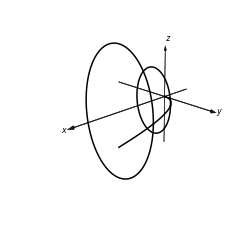

In [24]:
# figure set-up
fig13a = plt.figure(figsize=(4,4))
ax13a = plt.axes(projection='3d')
ax13a.set_xlim3d(0, 4)
ax13a.set_ylim3d(-2, 2)
ax13a.set_zlim3d(-1, 1)
ax13a.axis('off')
ax13a.margins(0,0,0)

ax13a.plot3D(np.linspace(0, 4, 100), [np.sqrt(t) for t in np.linspace(0, 4, 100)], [0 for _ in range(100)], color='black')

ax13a.plot3D([0.5 for _ in range(100)], [np.sqrt(0.5)*np.cos(t) for t in np.linspace(0, 2*np.pi, 100)], [np.sqrt(0.5)*np.sin(t) for t in np.linspace(0, 2*np.pi, 100)], color='black')
ax13a.plot3D([2 for _ in range(100)], [np.sqrt(2)*np.cos(t) for t in np.linspace(0, 2*np.pi, 100)], [np.sqrt(2)*np.sin(t) for t in np.linspace(0, 2*np.pi, 100)], color='black')

# Axis
arrow3d(ax13a, length=5.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax13a, length=4.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-2,0), color='black')
arrow3d(ax13a, length=2.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax13a.text(4.3, 0, 0, "x", color='black', size=8)
ax13a.text(0, 2.1, 0, "y", color='black', size=8)
ax13a.text(0, 0, 1.2, "z", color='black', size=8)

ax13a.view_init(20, 45)
fig13a.savefig("fig_ana_geo_13a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_13b

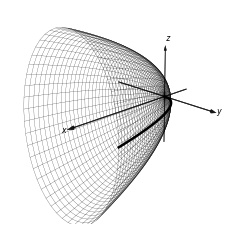

In [25]:
# figure set-up
fig13b = plt.figure(figsize=(4,4))
ax13b = plt.axes(projection='3d')
ax13b.set_xlim3d(0, 4)
ax13b.set_ylim3d(-2, 2)
ax13b.set_zlim3d(-1, 1)
ax13b.axis('off')
ax13b.margins(0,0,0)

ax13b.plot3D(np.linspace(0, 4, 100), [np.sqrt(t) for t in np.linspace(0, 4, 100)], [0 for _ in range(100)], color='black', lw=2.5)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
x = R**2

# Express the mesh in the cartesian system.
z, y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax13b.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Axis
arrow3d(ax13b, length=5.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax13b, length=4.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-2,0), color='black')
arrow3d(ax13b, length=2.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax13b.text(4.3, 0, 0, "x", color='black', size=8)
ax13b.text(0, 2.1, 0, "y", color='black', size=8)
ax13b.text(0, 0, 1.2, "z", color='black', size=8)

ax13b.view_init(20, 45)
fig13b.savefig("fig_ana_geo_13b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_14a

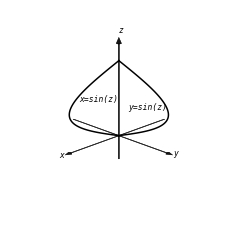

In [26]:
# figure set-up
fig14a = plt.figure(figsize=(4,4))
ax14a = plt.axes(projection='3d')
ax14a.set_xlim3d(-1, 1)
ax14a.set_ylim3d(-1, 1)
ax14a.set_zlim3d(-1, 3)
ax14a.axis('off')
ax14a.margins(0,0,0)

ax14a.plot3D([0 for _ in range(100)], [np.sin(t) for t in np.linspace(0, np.pi, 100)], [t for t in np.linspace(0, np.pi, 100)], color='black')
ax14a.plot3D([np.sin(t) for t in np.linspace(0, np.pi, 100)], [0 for _ in range(100)], [t for t in np.linspace(0, np.pi, 100)], color='black')
ax14a.text(0.8, 0, 2, "x=sin(z)", color='black', size=8)
ax14a.text(-0.2, 0, 1, "y=sin(z)", color='black', size=8)

# Axis
arrow3d(ax14a, length=2.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax14a, length=2.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax14a, length=5.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax14a.text(1.2, 0, 0, "x", color='black', size=8)
ax14a.text(0, 1.1, 0, "y", color='black', size=8)
ax14a.text(0, 0, 4.3, "z", color='black', size=8)

ax14a.view_init(20, 45)
fig14a.savefig("fig_ana_geo_14a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_14b

<ipython-input-27-202c99b4e1be>:16: RuntimeWarning: invalid value encountered in arcsin
  z1 = np.arcsin(R)
<ipython-input-27-202c99b4e1be>:17: RuntimeWarning: invalid value encountered in arcsin
  z2 = np.pi-(np.arcsin(R))


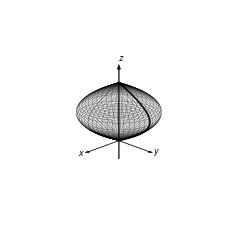

In [27]:
# figure set-up
fig14b = plt.figure(figsize=(4,4))
ax14b = plt.axes(projection='3d')
ax14a.set_xlim3d(-1, 1)
ax14a.set_ylim3d(-1, 1)
ax14a.set_zlim3d(-1, 3)
ax14b.axis('off')
ax14b.margins(0,0,0)

ax14b.plot3D([0 for _ in range(100)], [np.sin(t) for t in np.linspace(0, np.pi, 100)], [t for t in np.linspace(0, np.pi, 100)], color='black')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0.001, np.pi/2, 100)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z1 = np.arcsin(R)
z2 = np.pi-(np.arcsin(R))

# Express the mesh in the cartesian system.
x, y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax14b.plot_wireframe(x, y, z1, color='black', linewidth=0.2)
ax14b.plot_wireframe(x, y, z2, color='black', linewidth=0.2)

# Axis
arrow3d(ax14b, length=2.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax14b, length=2.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax14b, length=5.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax14b.text(1.3, 0, 0, "x", color='black', size=8)
ax14b.text(0, 1.1, 0, "y", color='black', size=8)
ax14b.text(0, 0, 4.3, "z", color='black', size=8)

ax14b.view_init(20, 45)
fig14b.savefig("fig_ana_geo_14b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_15a

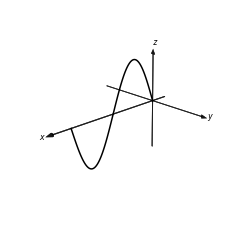

In [28]:
# figure set-up
fig15a = plt.figure(figsize=(4,4))
ax15a = plt.axes(projection='3d')
ax15a.set_xlim3d(-1, 6.4)
ax15a.set_ylim3d(-1, 1)
ax15a.set_zlim3d(-1, 1)
ax15a.axis('off')
ax15a.margins(0,0,0)

ax15a.plot3D([t for t in np.linspace(0, 2*np.pi, 100)], [0 for _ in range(100)], [np.sin(t) for t in np.linspace(0, 2*np.pi, 100)], color='black')

# Axis
arrow3d(ax15a, length=9.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax15a, length=2.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax15a, length=2.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax15a.text(8.5, 0, 0, "x", color='black', size=8)
ax15a.text(0, 1.1, 0, "y", color='black', size=8)
ax15a.text(0, 0, 1.2, "z", color='black', size=8)

ax15a.view_init(20, 45)
fig15a.savefig("fig_ana_geo_15a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_15b

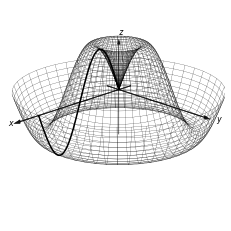

In [29]:
# figure set-up
fig15b = plt.figure(figsize=(4,4))
ax15b = plt.axes(projection='3d')
ax15b.set_xlim3d(-1, 6.5)
ax15b.set_ylim3d(-1, 6.5)
ax15b.set_zlim3d(-1, 1)
ax15b.axis('off')
ax15b.margins(0,0,0)

ax15b.plot3D([t for t in np.linspace(0, 2*np.pi, 100)], [0 for _ in range(100)], [np.sin(t) for t in np.linspace(0, 2*np.pi, 100)], color='black')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2*np.pi, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = np.sin(R)

# Express the mesh in the cartesian system.
x, y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax15b.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Axis
arrow3d(ax15b, length=9.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax15b, length=8.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax15b, length=2.1, width=0.01, head=0.05, headwidth=8, offset=(0,0,-1), color='black')

ax15b.text(8.5, 0, 0, "x", color='black', size=8)
ax15b.text(0, 7.5, 0, "y", color='black', size=8)
ax15b.text(0, 0, 1.2, "z", color='black', size=8)

ax15b.view_init(20, 45)
fig15b.savefig("fig_ana_geo_15b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_16

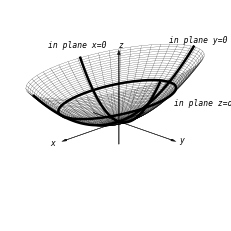

In [30]:
# figure set-up
fig16 = plt.figure(figsize=(4,4))
ax16 = plt.axes(projection='3d')
ax16.set_xlim3d(-1, 2.5)
ax16.set_ylim3d(-1, 2.5)
ax16.set_zlim3d(-1, 3)
ax16.axis('off')
ax16.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.5, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = R**2

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*2, R*np.sin(P)

# Plot the surface.
ax16.plot_wireframe(x, y, z, color='black', linewidth=0.2)

ax16.plot3D([2*t for t in np.linspace(-1.5, 1.5, 100)], [0 for _ in range(100)], [t**2 for t in np.linspace(-1.5, 1.5, 100)], color='black', lw=2.5)
ax16.plot3D([0 for _ in range(100)], [t for t in np.linspace(-1.5, 1.5, 100)], [t**2 for t in np.linspace(-1.5, 1.5, 100)], color='black', lw=2.5)
ax16.plot3D([t for t in np.linspace(-2, 2, 100)], [np.sqrt(-t**2/4+1) for t in np.linspace(-2, 2, 100)], [1 for _ in range(100)], color='black', lw=2.5)
ax16.plot3D([t for t in np.linspace(-2, 2, 100)], [-np.sqrt(-t**2/4+1) for t in np.linspace(-2, 2, 100)], [1 for _ in range(100)], color='black', lw=2.5)

ax16.text(2.5, 0, 4, "in plane x=0", color='black', size=8)
ax16.text(0, 1.8, 4, "in plane y=0", color='black', size=8)
ax16.text(0, 2, 1.5, "in plane z=d", color='black', size=8)

# Axis
arrow3d(ax16, length=3.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax16, length=3.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax16, length=4.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax16.text(2.5, 0, 0, "x", color='black', size=8)
ax16.text(0, 2.2, 0, "y", color='black', size=8)
ax16.text(0, 0, 3.2, "z", color='black', size=8)

ax16.view_init(20, 45)
fig16.savefig("fig_ana_geo_16.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_17a

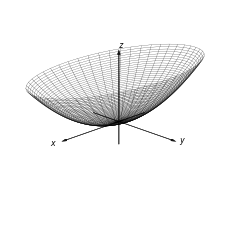

In [31]:
# figure set-up
fig17a = plt.figure(figsize=(4,4))
ax17a = plt.axes(projection='3d')
ax17a.set_xlim3d(-1, 2.5)
ax17a.set_ylim3d(-1, 2.5)
ax17a.set_zlim3d(-1, 3)
ax17a.axis('off')
ax17a.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.5, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = R**2

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*2, R*np.sin(P)

# Plot the surface.
ax17a.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Axis
arrow3d(ax17a, length=3.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax17a, length=3.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax17a, length=4.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax17a.text(2.5, 0, 0, "x", color='black', size=8)
ax17a.text(0, 2.2, 0, "y", color='black', size=8)
ax17a.text(0, 0, 3.2, "z", color='black', size=8)

ax17a.view_init(20, 45)
fig17a.savefig("fig_ana_geo_17a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_17b

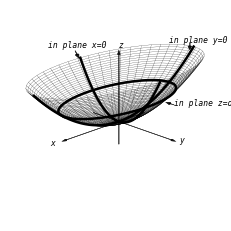

In [32]:
# figure set-up
fig17b = plt.figure(figsize=(4,4))
ax17b = plt.axes(projection='3d')
ax17b.set_xlim3d(-1, 2.5)
ax17b.set_ylim3d(-1, 2.5)
ax17b.set_zlim3d(-1, 3)
ax17b.axis('off')
ax17b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.5, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = R**2

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*2, R*np.sin(P)

# Plot the surface.
ax17b.plot_wireframe(x, y, z, color='black', linewidth=0.2)

ax17b.plot3D([2*t for t in np.linspace(-1.5, 1.5, 100)], [0 for _ in range(100)], [t**2 for t in np.linspace(-1.5, 1.5, 100)], color='black', lw=2.5)
ax17b.plot3D([0 for _ in range(100)], [t for t in np.linspace(-1.5, 1.5, 100)], [t**2 for t in np.linspace(-1.5, 1.5, 100)], color='black', lw=2.5)
ax17b.plot3D([t for t in np.linspace(-2, 2, 100)], [np.sqrt(-t**2/4+1) for t in np.linspace(-2, 2, 100)], [1 for _ in range(100)], color='black', lw=2.5)
ax17b.plot3D([t for t in np.linspace(-2, 2, 100)], [-np.sqrt(-t**2/4+1) for t in np.linspace(-2, 2, 100)], [1 for _ in range(100)], color='black', lw=2.5)

ax17b.text(2.5, 0, 4, "in plane x=0", color='black', size=8)
ax17b.text(0, 1.8, 4, "in plane y=0", color='black', size=8)
ax17b.text(0, 2, 1.5, "in plane z=d", color='black', size=8)

arrow3d(ax17b, length=0.361, width=0.01, head=0.5, headwidth=5, theta_x=200, theta_z=90, offset=(2.5,1,4.2), color='black')
arrow3d(ax17b, length=0.3, width=0.01, head=0.5, headwidth=5, theta_x=180, theta_z=0, offset=(0,2.5,4.2), color='black')
arrow3d(ax17b, length=0.3, width=0.01, head=0.5, headwidth=5, theta_x=90, offset=(0,2,1.5), color='black')

# Axis
arrow3d(ax17b, length=3.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax17b, length=3.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax17b, length=4.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax17b.text(2.5, 0, 0, "x", color='black', size=8)
ax17b.text(0, 2.2, 0, "y", color='black', size=8)
ax17b.text(0, 0, 3.2, "z", color='black', size=8)

ax17b.view_init(20, 45)
fig17b.savefig("fig_ana_geo_17b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_18a

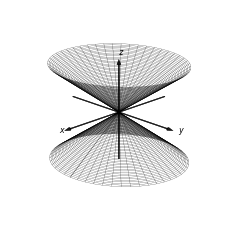

In [33]:
# figure set-up
fig18a = plt.figure(figsize=(4,4))
ax18a = plt.axes(projection='3d')
ax18a.set_xlim3d(-1, 1)
ax18a.set_ylim3d(-1, 1)
ax18a.set_zlim3d(-1, 1)
ax18a.axis('off')
ax18a.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = R

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*1, R*np.sin(P)*1.1

# Plot the surface.
ax18a.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax18a.plot_wireframe(x, y, -z, color='black', linewidth=0.2)


# Axis
arrow3d(ax18a, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax18a, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax18a, length=2.1, width=0.01, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax18a.text(1.2, 0, 0, "x", color='black', size=8)
ax18a.text(0, 1.2, 0, "y", color='black', size=8)
ax18a.text(0, 0, 1.2, "z", color='black', size=8)

ax18a.view_init(20, 45)
fig18a.savefig("fig_ana_geo_18a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_18b

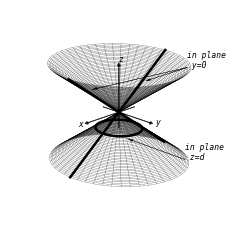

In [34]:
# figure set-up
fig18b = plt.figure(figsize=(4,4))
ax18b = plt.axes(projection='3d')
ax18b.set_xlim3d(-3, 3)
ax18b.set_ylim3d(-3, 3)
ax18b.set_zlim3d(-3, 3)
ax18b.axis('off')
ax18b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 3, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = R

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*1, R*np.sin(P)*1.1

# Plot the surface.
ax18b.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax18b.plot_wireframe(x, y, -z, color='black', linewidth=0.2)

ax18b.plot3D([1*t for t in np.linspace(-3, 3, 100)], [0 for _ in range(100)], [t for t in np.linspace(-3, 3, 100)], color='black', lw=2.5)
ax18b.plot3D([1*t for t in np.linspace(-3, 3, 100)], [0 for _ in range(100)], [-t for t in np.linspace(-3, 3, 100)], color='black', lw=2.5)
ax18b.plot3D([t for t in np.linspace(-1, 1, 1000)], [np.sqrt(-t**2+1)*1.1 for t in np.linspace(-1, 1, 1000)], [-1 for _ in range(1000)], color='black', lw=2.5)
ax18b.plot3D([t for t in np.linspace(-1, 1, 1000)], [-np.sqrt(-t**2+1)*1.1 for t in np.linspace(-1, 1, 1000)], [-1 for _ in range(1000)], color='black', lw=2.5)

ax18b.text(0, 4, 4, "in plane \n y=0", color='black', size=8)
ax18b.text(0, 4, -1.5, "in plane \n z=d", color='black', size=8)

arrow3d(ax18b, length=2.5, width=0.01, head=0.1, headwidth=5, theta_x=90, theta_z=90, offset=(0,4,4), color='black')
arrow3d(ax18b, length=5.5, width=0.01, head=0.05, headwidth=5, theta_x=85, theta_z=90, offset=(0,4,4), color='black')
arrow3d(ax18b, length=3.5, width=0.01, head=0.1, headwidth=5, theta_x=90, offset=(0,4,-1.5), color='black')

# Axis
arrow3d(ax18b, length=3.1, width=0.02, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax18b, length=3.1, width=0.02, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax18b, length=4.1, width=0.02, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax18b.text(2.5, 0, 0, "x", color='black', size=8)
ax18b.text(0, 2.2, 0, "y", color='black', size=8)
ax18b.text(0, 0, 3.2, "z", color='black', size=8)

ax18b.view_init(20, 45)
fig18b.savefig("fig_ana_geo_18b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_18c

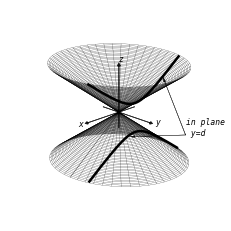

In [35]:
# figure set-up
fig18c = plt.figure(figsize=(4,4))
ax18c = plt.axes(projection='3d')
ax18c.set_xlim3d(-3, 3)
ax18c.set_ylim3d(-3, 3)
ax18c.set_zlim3d(-3, 3)
ax18c.axis('off')
ax18c.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 3, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = R

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*1, R*np.sin(P)*1.1

# Plot the surface.
ax18c.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax18c.plot_wireframe(x, y, -z, color='black', linewidth=0.2)

ax18c.plot3D([t for t in np.linspace(-2.8, 2.8, 1000)], [1 for t in range(1000)], [np.sqrt(t**2 + 1/1.1**2) for t in np.linspace(-2.8, 2.8, 1000)], color='black', lw=2.5)
ax18c.plot3D([t for t in np.linspace(-2.8, 2.8, 1000)], [1 for t in range(1000)], [-np.sqrt(t**2 + 1/1.1**2) for t in np.linspace(-2.8, 2.8, 1000)], color='black', lw=2.5)

ax18c.text(0, 4, 0, "in plane \n y=d", color='black', size=8)

arrow3d(ax18c, length=2.4, width=0.01, head=0.1, headwidth=5, theta_x=90, theta_z=50, offset=(0,4,0), color='black')
arrow3d(ax18c, length=8, width=0.01, head=0.1, headwidth=5, theta_x=90, theta_z=-40, offset=(0,4,0), color='black')

# Axis
arrow3d(ax18c, length=3.1, width=0.02, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax18c, length=3.1, width=0.02, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax18c, length=4.1, width=0.02, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax18c.text(2.5, 0, 0, "x", color='black', size=8)
ax18c.text(0, 2.2, 0, "y", color='black', size=8)
ax18c.text(0, 0, 3.2, "z", color='black', size=8)

ax18c.view_init(20, 45)
fig18c.savefig("fig_ana_geo_18c.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_19a

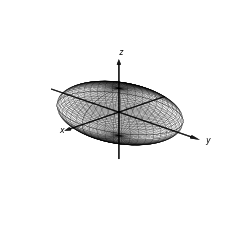

In [36]:
# figure set-up
fig19a = plt.figure(figsize=(4,4))
ax19a = plt.axes(projection='3d')
ax19a.set_xlim3d(-1, 1)
ax19a.set_ylim3d(-1, 1)
ax19a.set_zlim3d(-1, 1)
ax19a.axis('off')
ax19a.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = np.sqrt(1-R**2)*0.5

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*0.75, R*np.sin(P)*1.1

# Plot the surface.
ax19a.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax19a.plot_wireframe(x, y, -z, color='black', linewidth=0.2)


# Axis
arrow3d(ax19a, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax19a, length=3.1, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1.5,0), color='black')
arrow3d(ax19a, length=2.1, width=0.01, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax19a.text(1.2, 0, 0, "x", color='black', size=8)
ax19a.text(0, 1.7, 0, "y", color='black', size=8)
ax19a.text(0, 0, 1.2, "z", color='black', size=8)

ax19a.view_init(20, 45)
fig19a.savefig("fig_ana_geo_19a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_19b

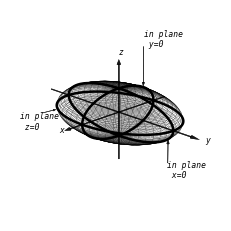

In [37]:
# figure set-up
fig19b = plt.figure(figsize=(4,4))
ax19b = plt.axes(projection='3d')
ax19b.set_xlim3d(-1, 1)
ax19b.set_ylim3d(-1, 1)
ax19b.set_zlim3d(-1, 1)
ax19b.axis('off')
ax19b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = np.sqrt(1-R**2)*0.5

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*0.75, R*np.sin(P)*1.1

# Plot the surface.
ax19b.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax19b.plot_wireframe(x, y, -z, color='black', linewidth=0.2)

ax19b.plot3D([0 for _ in range(1000)], [t for t in np.linspace(-1.1, 1.1, 1000)], [np.sqrt(1-(t/1.1)**2)*0.5 for t in np.linspace(-1.1, 1.1, 1000)], color='black', lw=2.5)
ax19b.plot3D([0 for _ in range(1000)], [t for t in np.linspace(-1.1, 1.1, 1000)], [-np.sqrt(1-(t/1.1)**2)*0.5 for t in np.linspace(-1.1, 1.1, 1000)], color='black', lw=2.5)

ax19b.plot3D([t for t in np.linspace(-0.75, 0.75, 1000)], [0 for _ in range(1000)], [np.sqrt(1-(t/0.75)**2)*0.5 for t in np.linspace(-0.75, 0.75, 1000)], color='black', lw=2.5)
ax19b.plot3D([t for t in np.linspace(-0.75, 0.75, 1000)], [0 for _ in range(1000)], [-np.sqrt(1-(t/0.75)**2)*0.5 for t in np.linspace(-0.75, 0.75, 1000)], color='black', lw=2.5)

ax19b.plot3D([t for t in np.linspace(-0.75, 0.75, 1000)], [np.sqrt(1-(t/0.75)**2)*1.1 for t in np.linspace(-0.75, 0.75, 1000)], [0 for _ in range(1000)], color='black', lw=2.5)
ax19b.plot3D([t for t in np.linspace(-0.75, 0.75, 1000)], [-np.sqrt(1-(t/0.75)**2)*1.1 for t in np.linspace(-0.75, 0.75, 1000)], [0 for _ in range(1000)], color='black', lw=2.5)

ax19b.text(0, 0.5, 1.5, "in plane \n y=0", color='black', size=8)
ax19b.text(0, 1, -1, "in plane \n x=0", color='black', size=8)
ax19b.text(1.5, -0.5, 0, "in plane \n z=0", color='black', size=8)

arrow3d(ax19b, length=0.8, width=0.005, head=0.1, headwidth=4, theta_x=180, theta_z=-90, offset=(0,0.5,1.5), color='black')
arrow3d(ax19b, length=0.5, width=0.005, head=0.2, headwidth=4, theta_x=0, theta_z=90, offset=(0,1,-0.7), color='black')
arrow3d(ax19b, length=0.2, width=0.005, head=0.2, headwidth=4, theta_x=-70, theta_z=45, offset=(1.5,0,0.5), color='black')

# Axis
arrow3d(ax19b, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax19b, length=3.1, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1.5,0), color='black')
arrow3d(ax19b, length=2.1, width=0.01, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax19b.text(1.2, 0, 0, "x", color='black', size=8)
ax19b.text(0, 1.7, 0, "y", color='black', size=8)
ax19b.text(0, 0, 1.2, "z", color='black', size=8)

ax19b.view_init(20, 45)
fig19b.savefig("fig_ana_geo_19b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_20a

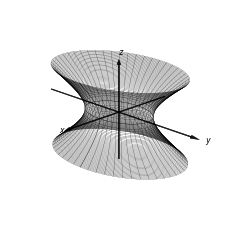

In [38]:
# figure set-up
fig20a = plt.figure(figsize=(4,4))
ax20a = plt.axes(projection='3d')
ax20a.set_xlim3d(-1, 1)
ax20a.set_ylim3d(-1, 1)
ax20a.set_zlim3d(-1, 1)
ax20a.axis('off')
ax20a.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(1, 2, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = np.sqrt(-1+R**2)*0.5

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*0.4, R*np.sin(P)*0.6

# Plot the surface.
ax20a.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax20a.plot_wireframe(x, y, -z, color='black', linewidth=0.2)

# Axis
arrow3d(ax20a, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax20a, length=3.1, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1.5,0), color='black')
arrow3d(ax20a, length=2.1, width=0.01, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax20a.text(1.2, 0, 0, "x", color='black', size=8)
ax20a.text(0, 1.7, 0, "y", color='black', size=8)
ax20a.text(0, 0, 1.2, "z", color='black', size=8)

ax20a.view_init(20, 45)
fig20a.savefig("fig_ana_geo_20a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_20b

<ipython-input-39-043ecdc09aa7>:23: RuntimeWarning: invalid value encountered in sqrt
  ax20b.plot3D([0 for _ in range(2000)], [t for t in np.linspace(-1.2, 1.2, 2000)], [np.sqrt(-1+(t/0.6)**2)*0.5 for t in np.linspace(-1.2, 1.2, 2000)], color='black', lw=2.5)
<ipython-input-39-043ecdc09aa7>:24: RuntimeWarning: invalid value encountered in sqrt
  ax20b.plot3D([0 for _ in range(2000)], [t for t in np.linspace(-1.2, 1.2, 2000)], [-np.sqrt(-1+(t/0.6)**2)*0.5 for t in np.linspace(-1.2, 1.2, 2000)], color='black', lw=2.5)
<ipython-input-39-043ecdc09aa7>:26: RuntimeWarning: invalid value encountered in sqrt
  ax20b.plot3D([t for t in np.linspace(-.8, .8, 2000)], [0 for _ in range(2000)], [np.sqrt(-1+(t/0.4)**2)*0.5 for t in np.linspace(-.8, .8, 2000)], color='black', lw=2.5)
<ipython-input-39-043ecdc09aa7>:27: RuntimeWarning: invalid value encountered in sqrt
  ax20b.plot3D([t for t in np.linspace(-.8, .8, 2000)], [0 for _ in range(2000)], [-np.sqrt(-1+(t/0.4)**2)*0.5 for t in np.linspace(-.

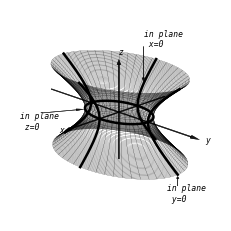

In [39]:
# figure set-up
fig20b = plt.figure(figsize=(4,4))
ax20b = plt.axes(projection='3d')
ax20b.set_xlim3d(-1, 1)
ax20b.set_ylim3d(-1, 1)
ax20b.set_zlim3d(-1, 1)
ax20b.axis('off')
ax20b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(1, 2, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = np.sqrt(-1+R**2)*0.5

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*0.4, R*np.sin(P)*0.6

# Plot the surface.
ax20b.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax20b.plot_wireframe(x, y, -z, color='black', linewidth=0.2)

ax20b.plot3D([0 for _ in range(2000)], [t for t in np.linspace(-1.2, 1.2, 2000)], [np.sqrt(-1+(t/0.6)**2)*0.5 for t in np.linspace(-1.2, 1.2, 2000)], color='black', lw=2.5)
ax20b.plot3D([0 for _ in range(2000)], [t for t in np.linspace(-1.2, 1.2, 2000)], [-np.sqrt(-1+(t/0.6)**2)*0.5 for t in np.linspace(-1.2, 1.2, 2000)], color='black', lw=2.5)

ax20b.plot3D([t for t in np.linspace(-.8, .8, 2000)], [0 for _ in range(2000)], [np.sqrt(-1+(t/0.4)**2)*0.5 for t in np.linspace(-.8, .8, 2000)], color='black', lw=2.5)
ax20b.plot3D([t for t in np.linspace(-.8, .8, 2000)], [0 for _ in range(2000)], [-np.sqrt(-1+(t/0.4)**2)*0.5 for t in np.linspace(-.8, .8, 2000)], color='black', lw=2.5)

ax20b.plot3D([t for t in np.linspace(-0.75, 0.75, 2000)], [np.sqrt(1-(t/0.4)**2)*0.6 for t in np.linspace(-0.75, 0.75, 2000)], [0 for _ in range(2000)], color='black', lw=2.5)
ax20b.plot3D([t for t in np.linspace(-0.75, 0.75, 2000)], [-np.sqrt(1-(t/0.4)**2)*0.6 for t in np.linspace(-0.75, 0.75, 2000)], [0 for _ in range(2000)], color='black', lw=2.5)

ax20b.text(0, 0.5, 1.5, "in plane \n x=0", color='black', size=8)
ax20b.text(0, 1, -1.5, "in plane \n y=0", color='black', size=8)
ax20b.text(1.5, -0.5, 0, "in plane \n z=0", color='black', size=8)

arrow3d(ax20b, length=0.7, width=0.005, head=0.1, headwidth=4, theta_x=180, theta_z=-90, offset=(0,0.5,1.5), color='black')
arrow3d(ax20b, length=0.2, width=0.005, head=0.2, headwidth=4, theta_x=0, theta_z=90, offset=(0,1.2,-1.1), color='black')
arrow3d(ax20b, length=0.6, width=0.005, head=0.2, headwidth=4, theta_x=-90, theta_z=60, offset=(1.5,0,0.5), color='black')

# Axis
arrow3d(ax20b, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax20b, length=3.1, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1.5,0), color='black')
arrow3d(ax20b, length=2.1, width=0.01, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax20b.text(1.2, 0, 0, "x", color='black', size=8)
ax20b.text(0, 1.7, 0, "y", color='black', size=8)
ax20b.text(0, 0, 1.2, "z", color='black', size=8)

ax20b.view_init(20, 45)
fig20b.savefig("fig_ana_geo_20b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_21a

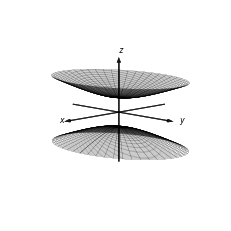

In [40]:
# figure set-up
fig21a = plt.figure(figsize=(4,4))
ax21a = plt.axes(projection='3d')
ax21a.set_xlim3d(-1, 1)
ax21a.set_ylim3d(-1, 1)
ax21a.set_zlim3d(-1, 1)
ax21a.axis('off')
ax21a.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = np.sqrt(1+R**2)*0.3

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*0.4, R*np.sin(P)*0.6

# Plot the surface.
ax21a.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax21a.plot_wireframe(x, y, -z, color='black', linewidth=0.2)

# Axis
arrow3d(ax21a, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax21a, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax21a, length=2.1, width=0.01, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax21a.text(1.2, 0, 0, "x", color='black', size=8)
ax21a.text(0, 1.2, 0, "y", color='black', size=8)
ax21a.text(0, 0, 1.2, "z", color='black', size=8)

ax21a.view_init(10, 45)
fig21a.savefig("fig_ana_geo_21a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_21b

<ipython-input-41-70edc7016ad9>:29: RuntimeWarning: invalid value encountered in sqrt
  ax21b.plot3D([t for t in np.linspace(-0.75, 0.75, 2000)], [np.sqrt((0.5/0.3)**2-1-(t/0.4)**2)*0.6 for t in np.linspace(-0.75, 0.75, 2000)], [-0.5 for _ in range(2000)], color='black', lw=2.5)
<ipython-input-41-70edc7016ad9>:30: RuntimeWarning: invalid value encountered in sqrt
  ax21b.plot3D([t for t in np.linspace(-0.75, 0.75, 2000)], [-np.sqrt((0.5/0.3)**2-1-(t/0.4)**2)*0.6 for t in np.linspace(-0.75, 0.75, 2000)], [-0.5 for _ in range(2000)], color='black', lw=2.5)


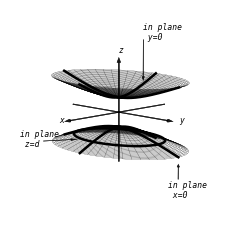

In [41]:
# figure set-up
fig21b = plt.figure(figsize=(4,4))
ax21b = plt.axes(projection='3d')
ax21b.set_xlim3d(-1, 1)
ax21b.set_ylim3d(-1, 1)
ax21b.set_zlim3d(-1, 1)
ax21b.axis('off')
ax21b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = np.sqrt(1+R**2)*0.3

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*0.4, R*np.sin(P)*0.6

# Plot the surface.
ax21b.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax21b.plot_wireframe(x, y, -z, color='black', linewidth=0.2)

ax21b.plot3D([0 for _ in range(2000)], [t for t in np.linspace(-1.2, 1.2, 2000)], [np.sqrt(1+(t/0.6)**2)*0.3 for t in np.linspace(-1.2, 1.2, 2000)], color='black', lw=2.5)
ax21b.plot3D([0 for _ in range(2000)], [t for t in np.linspace(-1.2, 1.2, 2000)], [-np.sqrt(1+(t/0.6)**2)*0.3 for t in np.linspace(-1.2, 1.2, 2000)], color='black', lw=2.5)

ax21b.plot3D([t for t in np.linspace(-.8, .8, 2000)], [0 for _ in range(2000)], [np.sqrt(1+(t/0.4)**2)*0.3 for t in np.linspace(-.8, .8, 2000)], color='black', lw=2.5)
ax21b.plot3D([t for t in np.linspace(-.8, .8, 2000)], [0 for _ in range(2000)], [-np.sqrt(1+(t/0.4)**2)*0.3 for t in np.linspace(-.8, .8, 2000)], color='black', lw=2.5)

ax21b.plot3D([t for t in np.linspace(-0.75, 0.75, 2000)], [np.sqrt((0.5/0.3)**2-1-(t/0.4)**2)*0.6 for t in np.linspace(-0.75, 0.75, 2000)], [-0.5 for _ in range(2000)], color='black', lw=2.5)
ax21b.plot3D([t for t in np.linspace(-0.75, 0.75, 2000)], [-np.sqrt((0.5/0.3)**2-1-(t/0.4)**2)*0.6 for t in np.linspace(-0.75, 0.75, 2000)], [-0.5 for _ in range(2000)], color='black', lw=2.5)

ax21b.text(0, 0.5, 1.5, "in plane \n y=0", color='black', size=8)
ax21b.text(0, 1, -1.5, "in plane \n x=0", color='black', size=8)
ax21b.text(1.5, -0.5, -0.5, "in plane \n z=d", color='black', size=8)

arrow3d(ax21b, length=0.8, width=0.005, head=0.1, headwidth=4, theta_x=180, theta_z=-90, offset=(0,0.5,1.5), color='black')
arrow3d(ax21b, length=0.3, width=0.005, head=0.2, headwidth=4, theta_x=0, theta_z=90, offset=(0,1.2,-1.1), color='black')
arrow3d(ax21b, length=0.5, width=0.005, head=0.2, headwidth=4, theta_x=-90, theta_z=60, offset=(1.5,0,-0.3), color='black')

# Axis
arrow3d(ax21b, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax21b, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax21b, length=2.1, width=0.01, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax21b.text(1.2, 0, 0, "x", color='black', size=8)
ax21b.text(0, 1.2, 0, "y", color='black', size=8)
ax21b.text(0, 0, 1.2, "z", color='black', size=8)

ax21b.view_init(10, 45)
fig21b.savefig("fig_ana_geo_21b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_22a

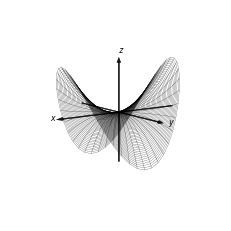

In [42]:
# figure set-up
fig22a = plt.figure(figsize=(4,4))
ax22a = plt.axes(projection='3d')
ax22a.set_xlim3d(-1, 1)
ax22a.set_ylim3d(-1, 1)
ax22a.set_zlim3d(-1, 1)
ax22a.axis('off')
ax22a.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*1, R*np.sin(P)*0.7

z = (x/1)**2 - (y/0.7)**2

# Plot the surface.
ax22a.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Axis
arrow3d(ax22a, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax22a, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax22a, length=2.1, width=0.01, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax22a.text(1.2, 0, 0, "x", color='black', size=8)
ax22a.text(0, 1.2, 0, "y", color='black', size=8)
ax22a.text(0, 0, 1.2, "z", color='black', size=8)

ax22a.view_init(10, 55)
fig22a.savefig("fig_ana_geo_22a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_22b

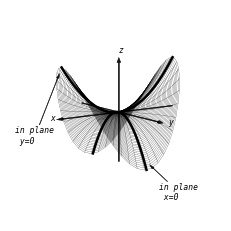

In [43]:
# figure set-up
fig22b = plt.figure(figsize=(4,4))
ax22b = plt.axes(projection='3d')
ax22b.set_xlim3d(-1, 1)
ax22b.set_ylim3d(-1, 1)
ax22b.set_zlim3d(-1, 1)
ax22b.axis('off')
ax22b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*1, R*np.sin(P)*0.7

z = (x/1)**2 - (y/0.7)**2

# Plot the surface.
ax22b.plot_wireframe(x, y, z, color='black', linewidth=0.2)

ax22b.plot3D([0 for _ in range(1000)], [t for t in np.linspace(-.7, .7, 1000)], [-(t/0.7)**2 for t in np.linspace(-.7, .7, 1000)], color='black', lw=2.5)

ax22b.plot3D([t for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], [(t/1)**2 for t in np.linspace(-1, 1, 1000)], color='black', lw=2.5)

ax22b.text(0, 1, -1.5, "in plane \n x=0", color='black', size=8)
ax22b.text(1.5, -0.5, -0.5, "in plane \n y=0", color='black', size=8)

arrow3d(ax22b, length=1, width=0.005, head=0.1, headwidth=4, theta_x=-20, theta_z=90, offset=(1.5,0.2,-0), color='black')
arrow3d(ax22b, length=0.5, width=0.005, head=0.2, headwidth=4, theta_x=40, theta_z=90, offset=(0,1.2,-1.1), color='black')

# Axis
arrow3d(ax22b, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax22b, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax22b, length=2.1, width=0.01, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax22b.text(1.2, 0, 0, "x", color='black', size=8)
ax22b.text(0, 1.2, 0, "y", color='black', size=8)
ax22b.text(0, 0, 1.2, "z", color='black', size=8)

ax22b.view_init(10, 55)
fig22b.savefig("fig_ana_geo_22b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_22c

<ipython-input-44-70845b9f53ac>:22: RuntimeWarning: invalid value encountered in sqrt
  ax22c.plot3D([t for t in np.linspace(-1, 1, 5000)], [np.sqrt((t/1)**2-0.5)*0.7 for t in np.linspace(-1, 1, 5000)], [0.5 for _ in range(5000)], color='black', lw=2.5)
<ipython-input-44-70845b9f53ac>:23: RuntimeWarning: invalid value encountered in sqrt
  ax22c.plot3D([t for t in np.linspace(-1, 1, 5000)], [-np.sqrt((t/1)**2-0.5)*0.7 for t in np.linspace(-1, 1, 5000)], [0.5 for _ in range(5000)], color='black', lw=2.5)


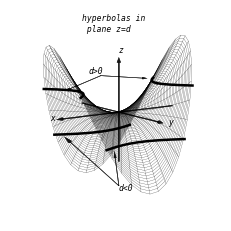

In [44]:
# figure set-up
fig22c = plt.figure(figsize=(4,4))
ax22c = plt.axes(projection='3d')
ax22c.set_xlim3d(-1, 1)
ax22c.set_ylim3d(-1, 1)
ax22c.set_zlim3d(-1, 1)
ax22c.axis('off')
ax22c.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.2, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*1, R*np.sin(P)*0.7

z = (x/1)**2 - (y/0.7)**2

# Plot the surface.
ax22c.plot_wireframe(x, y, z, color='black', linewidth=0.2)

ax22c.plot3D([t for t in np.linspace(-1, 1, 5000)], [np.sqrt((t/1)**2-0.5)*0.7 for t in np.linspace(-1, 1, 5000)], [0.5 for _ in range(5000)], color='black', lw=2.5)
ax22c.plot3D([t for t in np.linspace(-1, 1, 5000)], [-np.sqrt((t/1)**2-0.5)*0.7 for t in np.linspace(-1, 1, 5000)], [0.5 for _ in range(5000)], color='black', lw=2.5)

ax22c.plot3D([t for t in np.linspace(-.7, .7, 1000)], [np.sqrt((t/1)**2+0.5)*0.7 for t in np.linspace(-.7, .7, 1000)], [-0.5 for _ in range(1000)], color='black', lw=2.5)
ax22c.plot3D([t for t in np.linspace(-.7, .7, 1000)], [-np.sqrt((t/1)**2+0.5)*0.7 for t in np.linspace(-.7, .7, 1000)], [-0.5 for _ in range(1000)], color='black', lw=2.5)

ax22c.text(0, -1, 1.5, "hyperbolas in \n plane z=d", color='black', size=8)
ax22c.text(0, 0, -1.6, "d<0", color='black', size=8)
ax22c.text(1, 0.7, 1, "d>0", color='black', size=8)

arrow3d(ax22c, length=0.6, width=0.005, head=0.1, headwidth=4, theta_x=110, theta_z=90, offset=(1,1,1), color='black')
arrow3d(ax22c, length=0.8, width=0.005, head=0.1, headwidth=4, theta_x=-100, theta_z=90, offset=(1,1,1), color='black')

arrow3d(ax22c, length=1.5, width=0.005, head=0.1, headwidth=6, theta_x=40, theta_z=90, offset=(0,0,-1.5), color='black')
arrow3d(ax22c, length=0.7, width=0.005, head=0.2, headwidth=4, theta_x=10, theta_z=0, offset=(0,0,-1.5), color='black')

# Axis
arrow3d(ax22c, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax22c, length=2.1, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax22c, length=2.1, width=0.01, head=0.05, headwidth=3, offset=(0,0,-1), color='black')

ax22c.text(1.2, 0, 0, "x", color='black', size=8)
ax22c.text(0, 1.2, 0, "y", color='black', size=8)
ax22c.text(0, 0, 1.2, "z", color='black', size=8)

ax22c.view_init(10, 55)
fig22c.savefig("fig_ana_geo_22c.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_23a

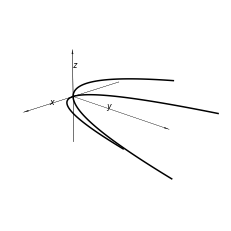

In [45]:
# figure set-up
fig23a = plt.figure(figsize=(4,4))
ax23a = plt.axes(projection='3d')
ax23a.set_xlim3d(-5, 5)
ax23a.set_ylim3d(0, 6)
ax23a.set_zlim3d(-5, 5)
ax23a.axis('off')
ax23a.margins(0,0,0)

ax23a.plot3D([t for t in np.linspace(-5, 5, 100)], [t**2/4 for t in np.linspace(-5, 5, 100)], [0 for _ in range(100)], color='black')
ax23a.plot3D([0 for _ in range(100)], [t**2/4 for t in np.linspace(-5, 5, 100)], [t for t in np.linspace(-5, 5, 100)], color='black')

# Axis
arrow3d(ax23a, length=10.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-5,0,0), color='black')
arrow3d(ax23a, length=6.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,0,0), color='black')
arrow3d(ax23a, length=10.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-5), color='black')

ax23a.text(2.5, 0, 0, "x", color='black', size=8)
ax23a.text(0, 2.2, 0, "y", color='black', size=8)
ax23a.text(0, 0, 3.2, "z", color='black', size=8)

ax23a.view_init(20, 45)
fig23a.savefig("fig_ana_geo_23a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_23b

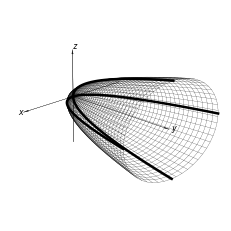

In [46]:
# figure set-up
fig23b = plt.figure(figsize=(4,4))
ax23b = plt.axes(projection='3d')
ax23b.set_xlim3d(-5, 5)
ax23b.set_ylim3d(0, 6)
ax23b.set_zlim3d(-5, 5)
ax23b.axis('off')
ax23b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2.5, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
y = R**2

# Express the mesh in the cartesian system.
x, z = R*np.cos(P)*2, R*np.sin(P)*2

# Plot the surface.
ax23b.plot_wireframe(x, y, z, color='black', linewidth=0.2)

ax23b.plot3D([t for t in np.linspace(-5, 5, 100)], [t**2/4 for t in np.linspace(-5, 5, 100)], [0 for _ in range(100)], color='black', lw=2.5)
ax23b.plot3D([0 for _ in range(100)], [t**2/4 for t in np.linspace(-5, 5, 100)], [t for t in np.linspace(-5, 5, 100)], color='black', lw=2.5)

# Axis
arrow3d(ax23b, length=10.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-5,0,0), color='black')
arrow3d(ax23b, length=6.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,0,0), color='black')
arrow3d(ax23b, length=10.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-5), color='black')

ax23b.text(5.5, 0, 0, "x", color='black', size=8)
ax23b.text(0, 6.2, 0, "y", color='black', size=8)
ax23b.text(0, 0, 5.2, "z", color='black', size=8)

ax23b.view_init(20, 45)
fig23b.savefig("fig_ana_geo_23b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_24a

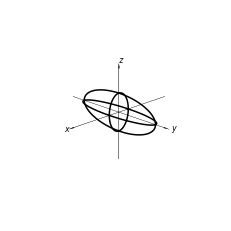

In [47]:
# figure set-up
fig24a = plt.figure(figsize=(4,4))
ax24a = plt.axes(projection='3d')
ax24a.set_xlim3d(-5, 5)
ax24a.set_ylim3d(-4, 4)
ax24a.set_zlim3d(-5, 5)
ax24a.axis('off')
ax24a.margins(0,0,0)

ax24a.plot3D([t for t in np.linspace(-1, 1, 1000)], [np.sqrt(1-(t/1)**2)*3 for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], color='black')
ax24a.plot3D([t for t in np.linspace(-1, 1, 1000)], [-np.sqrt(1-(t/1)**2)*3 for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], color='black')

ax24a.plot3D([0 for _ in range(1000)], [np.sqrt(1-(t/2)**2)*3 for t in np.linspace(-2, 2, 1000)], [t for t in np.linspace(-2, 2, 1000)], color='black')
ax24a.plot3D([0 for _ in range(1000)], [-np.sqrt(1-(t/2)**2)*3 for t in np.linspace(-2, 2, 1000)], [t for t in np.linspace(-2, 2, 1000)], color='black')

ax24a.plot3D([t for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], [np.sqrt(1-(t/1)**2)*2 for t in np.linspace(-1, 1, 1000)], color='black')
ax24a.plot3D([t for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], [-np.sqrt(1-(t/1)**2)*2 for t in np.linspace(-1, 1, 1000)], color='black')

# Axis
arrow3d(ax24a, length=10.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-5,0,0), color='black')
arrow3d(ax24a, length=8.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-4,0), color='black')
arrow3d(ax24a, length=10.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-5), color='black')

ax24a.text(5.5, 0, 0, "x", color='black', size=8)
ax24a.text(0, 4.2, 0, "y", color='black', size=8)
ax24a.text(0, 0, 5.2, "z", color='black', size=8)

ax24a.view_init(20, 45)
fig24a.savefig("fig_ana_geo_24a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_24b

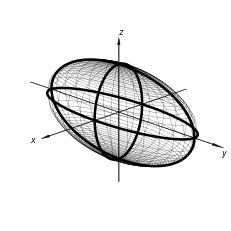

In [48]:
# figure set-up
fig24b = plt.figure(figsize=(4,4))
ax24b = plt.axes(projection='3d')
ax24b.set_xlim3d(-2, 2)
ax24b.set_ylim3d(-2, 2)
ax24b.set_zlim3d(-2, 2)
ax24b.axis('off')
ax24b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 30)
p = np.linspace(0, 2*np.pi, 30)
R, P = np.meshgrid(r, p)
z = np.sqrt(1-R**2)*2

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*1, R*np.sin(P)*3

# Plot the surface.
ax24b.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax24b.plot_wireframe(x, y, -z, color='black', linewidth=0.2)

ax24b.plot3D([t for t in np.linspace(-1, 1, 1000)], [np.sqrt(1-(t/1)**2)*3 for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], color='black', lw=2.5)
ax24b.plot3D([t for t in np.linspace(-1, 1, 1000)], [-np.sqrt(1-(t/1)**2)*3 for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], color='black', lw=2.5)

ax24b.plot3D([0 for _ in range(1000)], [np.sqrt(1-(t/2)**2)*3 for t in np.linspace(-2, 2, 1000)], [t for t in np.linspace(-2, 2, 1000)], color='black', lw=2.5)
ax24b.plot3D([0 for _ in range(1000)], [-np.sqrt(1-(t/2)**2)*3 for t in np.linspace(-2, 2, 1000)], [t for t in np.linspace(-2, 2, 1000)], color='black', lw=2.5)

ax24b.plot3D([t for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], [np.sqrt(1-(t/1)**2)*2 for t in np.linspace(-1, 1, 1000)], color='black', lw=2.5)
ax24b.plot3D([t for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], [-np.sqrt(1-(t/1)**2)*2 for t in np.linspace(-1, 1, 1000)], color='black', lw=2.5)

# Axis
arrow3d(ax24b, length=6.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-3,0,0), color='black')
arrow3d(ax24b, length=8.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-4,0), color='black')
arrow3d(ax24b, length=6.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-3), color='black')

ax24b.text(3.5, 0, 0, "x", color='black', size=8)
ax24b.text(0, 4, -0.3, "y", color='black', size=8)
ax24b.text(0, 0, 3.2, "z", color='black', size=8)

ax24b.view_init(20, 45)
fig24b.savefig("fig_ana_geo_24b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_25a

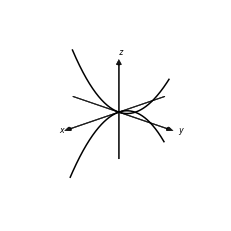

In [49]:
# figure set-up
fig25a = plt.figure(figsize=(4,4))
ax25a = plt.axes(projection='3d')
ax25a.set_xlim3d(-1, 1)
ax25a.set_ylim3d(-1, 1)
ax25a.set_zlim3d(-1, 1)
ax25a.axis('off')
ax25a.margins(0,0,0)

ax25a.plot3D([t for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], [-t**2 for t in np.linspace(-1, 1, 1000)], color='black')
ax25a.plot3D([0 for _ in range(1000)], [t for t in np.linspace(-1, 1, 1000)],[t**2 for t in np.linspace(-1, 1, 1000)], color='black')

# Axis
arrow3d(ax25a, length=2.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax25a, length=2.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax25a, length=2.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax25a.text(1.2, 0, 0, "x", color='black', size=8)
ax25a.text(0, 1.2, 0, "y", color='black', size=8)
ax25a.text(0, 0, 1.2, "z", color='black', size=8)

ax25a.view_init(20, 45)
fig25a.savefig("fig_ana_geo_25a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_ana_geo_25b

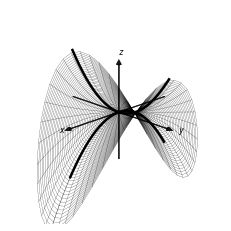

In [50]:
# figure set-up
fig25b = plt.figure(figsize=(4,4))
ax25b = plt.axes(projection='3d')
ax25b.set_xlim3d(-1, 1)
ax25b.set_ylim3d(-1, 1)
ax25b.set_zlim3d(-1, 1)
ax25b.axis('off')
ax25b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.4, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*1, R*np.sin(P)*0.7

z = -(x)**2 + (y)**2

# Plot the surface.
ax25b.plot_wireframe(x, y, z, color='black', linewidth=0.2)

ax25b.plot3D([t for t in np.linspace(-1, 1, 1000)], [0 for _ in range(1000)], [-t**2 for t in np.linspace(-1, 1, 1000)], color='black', lw=2.5)
ax25b.plot3D([0 for _ in range(1000)], [t for t in np.linspace(-1, 1, 1000)],[t**2 for t in np.linspace(-1, 1, 1000)], color='black', lw=2.5)

# Axis
arrow3d(ax25b, length=2.1, width=0.01, head=0.05, headwidth=4, theta_x=90, theta_z=90, offset=(-1,0,0), color='black')
arrow3d(ax25b, length=2.1, width=0.01, head=0.05, headwidth=4, theta_x=-90, offset=(0,-1,0), color='black')
arrow3d(ax25b, length=2.1, width=0.01, head=0.05, headwidth=4, offset=(0,0,-1), color='black')

ax25b.text(1.2, 0, 0, "x", color='black', size=8)
ax25b.text(0, 1.2, 0, "y", color='black', size=8)
ax25b.text(0, 0, 1.2, "z", color='black', size=8)

ax25b.view_init(20, 45)
fig25b.savefig("fig_ana_geo_25b.pdf",bbox_inches='tight',dpi=200)
plt.show()